# 분석  목적

 - 현장 이슈 : 콘택트렌즈의 도수에 영향을 주는 요인이 다양하고 작업자의 숙련도에 따라 금형조합별 도수 적중률이 크게 변화하는 문제가 있다
 
 - 목적 : 콘텐츠렌즈의 도수와 금형조합 간의 상관관계를 분석을 통해 콘택트렌즈의 도수를 예측하고 최적화 알고리즘을 이용해 최적의 금형조합을 구한다
 
 => 작업자의 기술 수준이 콘택트렌즈의 도수를 결정하는 금형의 선택과 연관되어 있다
 
 => 즉, 같은 금형이라도 작업자의 숙련도에 따라 도수의 적중률이 다르게 나타날 수 있다 
 
 => 이는 생산 일관성과 품질 관리에 영향을 미칠 수 있는 중요한 문제이다
 
 * 금형조합 : 제품의 형상, 크기, 속성 등을 결정하는데 사용되는 금형의 다양한 조합

# 분석 적용 알고리즘

- 연관 규칙 : 자료에 있는 항목들 간의 어떤 관계가 있는지 찾기 위한 알고리즘

    => 금형군(유사한 기능이나 형태를 가진 여러 금형들의 집합), 설비번호, 시퀀스, 목표도수를 기준으로 과거 생산이력에서 도수가 일치하는 데이터의 연관규칙을 분석하여 연관성이 가장 높은 금형조합을 탐색
    
- XGBoost : 의사결정나무 기반의 앙상블기법 중 하나

# 분석 개요

## 분석 배경

### 공정 개요

- 사출 성형 : 플라스틱 제품의 성형법 중 가장 보편적으로 쓰이는 방식, 열가소성 원료를 가열하여 매우 높은 소성 상태로 만들고 금형의 캐비티에 가압 주입 후 냉각시켜 성형품을 만드는 방법

- 사출성형 과정에서 온도, 시간, 위치, 속도 압력 등 공정 조건에 따라 성형품의 품질이 좌우될 수 있다

### 콘탠트렌즈 생산과정

- 몰드캐스팅 방식으로 생산하는 콘탠트렌즈 생산과정의 플라스틱 몰드의 사출공정에서의 최적 생산조건을 탐색하기 위한 분석을 수행

- 렌즈의 양면 형태를 가진 렌즈의 상형, 하형 몰드를 만들고, 원재료를 하형 몰드에 주입한 후 상형 몰드를 올려 렌즈를 성형하는 방법

<br>

- 몰드캐스팅 방식 : 플라스틱, 고무, 수지 등의 유동성을 가진 재료를 사용하여 부품이나 제품을 만드는 공정 방법 중 하나

### 공정상의 문제 현황, 해결 방안

작업자 숙련도에 따라 지시한 제품 규격과 생산된 제품의 규격 차이는 매우 크게 나타난다

=> 금형 조합 탐색 후 설비, 금형 위치를 고려하여 도수를 예측하고, 생산하고자 하는 목표 도수와 비교하여 차이가 작은 순으로 5개의 금형 조합을 추천한다

# 분석 목표

지시한 규격에 맞는 렌즈를 생산하기 위한 최적의 금형 조합의 추천을 목표로 한다

step1 : EDA 및 도수 예측 모델 학습
    
    => 데이터 취득, 데이터 전처리, XGBoost 모델 학습

step2 : 최적 금형 조합 탐색

    => 조건 입력, 금형조합 탐색(연관규칙분석), 도수 예측(XGBoost), 금형조합추천

## 데이터 정의

- 분석에 활용한 원천 제조 데이터는 콘택트렌즈 생산에 필요한 플라스틱 몰드사출공정 관한 요인을 EPR과 MES DB에서 수집한 것으로 폼목, 설비정보, 금형정보, 제품정보, 도수, 샘플링 결과 등으로 이루어져 있다

<br>

- 데이터셋 주요 변수

- EQUIP_ID : 설비번호

- MFG_DT : 작업시간

- SALE_CD : 판매코드

- MOLD_POS : 금형 위치

- REAL_POWER : 도수 

- CP : 난시 강도

- AX : 난시 각도

- MOLD_IN_TOP : 상형몰드 생산을 위한 바깥쪽 금형

- MOLD_IN_BOT : 상형몰드 생산을 위한 안쪽 금형

- MOLD_OUT_TOP : 하형몰드 생산을 위한 안쪽 금형

- MOLD_OUT_BOT : 하형모들 생산을 위한 바깥쪽 금형

- IN_RADIUS : 내측 곡률

- OUT_RADIUS : 외측 곡률

- POWER : 결정 도수

- POWER1 : 첫 번째 도수 측정 결과

- POWER2 : 두 번째 도수 측정 결과

- POWER3 : 새 번째 도수 측정 결과

- POWER4 : 네 번째 도수 측정 결과

- POWER5 : 다섯 번째 도수 측정 결과

# 라이브러리, 데이터 불러오기

In [1]:
# !pip install parse
# !pip install mlxtend --upgrade --no-deps
# !pip install pyswarm
# !pip install GPUtil

In [2]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 모델링 및 머신러닝
from sklearn.ensemble import IsolationForest # 이상치 탐지를 위한 앙상블 기반의 머신러닝 모델
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import fpgrowth # 데이터에서 빈발 패턴을 발견하는 FP-Growth 알고리즘
import xgboost
from xgboost import plot_importance

# 경고 제어
import warnings
warnings.filterwarnings('ignore')

# 기타
import argparse # 명령행 인터페이스를 파싱하기 위한 라이브러리
from parse import compile # 문자열을 구문 분석하기 위한 라이브러리
from pathlib import Path
from datetime import date, datetime
from pyswarm import pso # 파이썬을 위한 파티클 스웜 최적화 알고리즘
import GPUtil  # GPU 사용량을 검색하는 데 사용되는 유틸리티 라이브러리

In [3]:
path = './data/raw_data.csv' # 해당 데이터 경로
df_raw = pd.read_csv(path)

print(df_raw.shape)
df_raw.head(3)

(175102, 19)


,EQUIP_ID,MFG_DT,SALE_CD,MOLD_POS,REAL_POWER,CP,AX,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
0,EQUIP1,2021-03-23,SALES 0,8,0.0,NaN,NaN,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0075,CORE1 A 8A. D-00,-6.4889,6.5811,0.0,0.12,0.12,0.12,0.25,0.25
1,EQUIP2,2021-03-23,SALES 1,1,-6.5,NaN,NaN,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1050,CORE1 B 02. C-10,-6.3564,7.4551,-6.5,-6.25,-6.25,-6.37,-6.50,-6.50
2,EQUIP1,2021-03-25,SALES 2,2,0.0,NaN,NaN,CORE2 C 03. 0660,CORE2 C 03. P1+0,CORE2 C 04. M0000,CORE2 C 04. A-00,-7.3246,7.3802,0.0,0.12,0.12,0.25,0.25,0.25


# 데이터 탐색 및 정제

데이터 구성 확인

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175102 entries, 0 to 175101
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EQUIP_ID      175102 non-null  object 
 1   MFG_DT        175102 non-null  object 
 2   SALE_CD       175102 non-null  object 
 3   MOLD_POS      175102 non-null  int64  
 4   REAL_POWER    175089 non-null  float64
 5   CP            0 non-null       float64
 6   AX            0 non-null       float64
 7   MOLD_IN_TOP   175102 non-null  object 
 8   MOLD_IN_BOT   175102 non-null  object 
 9   MOLD_OUT_TOP  175102 non-null  object 
 10  MOLD_OUT_BOT  175102 non-null  object 
 11  IN_RADIUS     175102 non-null  float64
 12  OUT_RADIUS    175102 non-null  float64
 13  POWER         174522 non-null  float64
 14  POWER1        174572 non-null  float64
 15  POWER2        174570 non-null  float64
 16  POWER3        174565 non-null  float64
 17  POWER4        174562 non-null  float64
 18  POWE

=> 'CP', 'AX', 'POWER', 'POWER1', 'POWER2', 'POWER3', 'POWER4', 'POWER5' 컬럼에 Null값이 있다

<br>

요약 통계량 확인

In [5]:
df_raw.describe()

,MOLD_POS,REAL_POWER,CP,AX,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
count,175102.000000,175089.000000,0.0,0.0,175102.000000,175102.000000,174522.000000,174572.000000,174570.000000,174565.000000,174562.000000,174551.000000
mean,4.667639,-3.351588,NaN,NaN,-1.405773,2.002773,-3.354983,-3.353921,-3.362280,-3.368980,-3.376297,-3.383163
std,2.550721,2.401494,NaN,NaN,6.718276,6.720985,2.442768,2.404919,2.402462,2.403499,2.405053,2.407265
min,1.000000,-12.000000,NaN,NaN,-11.019500,-9.244400,-175.000000,-74.500000,-74.500000,-74.500000,-74.500000,-74.500000
25%,3.000000,-5.000000,NaN,NaN,-6.494700,-6.372300,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
50%,5.000000,-3.250000,NaN,NaN,-6.365000,6.804900,-3.250000,-3.250000,-3.250000,-3.250000,-3.250000,-3.370000
75%,7.000000,-1.500000,NaN,NaN,6.946300,7.349775,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000,-1.500000
max,16.000000,6.000000,NaN,NaN,9.569400,10.687200,20.000000,6.500000,6.500000,6.500000,12.000000,25.000000


# 데이터 전처리

자주 사용하는 변수 정의

'MOLD_IN_TOP', 'MOLD_IN_BOT', 'MOLD_OUT_TOP', 'MOLD_OUT_BOT같은 금형값 컬럼이나 'IN_RADIUS', 'OUT_RADIUS'같은 곡률값 컬럼처럼 코드 내 반복하여 사용될 값을 변수로 지정

In [6]:
# 금형조합과 곡률
CORES = ['MOLD_IN_TOP', 'MOLD_IN_BOT', 'MOLD_OUT_TOP', 'MOLD_OUT_BOT']
RADIUS = ['IN_RADIUS', 'OUT_RADIUS']
EQUIP_INFO = ['EQUIP_ID', 'MOLD_POS']
POWERS = ['POWER1', 'POWER2', 'POWER3', 'POWER4', 'POWER5']

렌즈 분류 및 카테고리 열 추가

렌즈의 도수(REAL_POWER)를 기준으로 렌즈의 종류를 근시, 무도수(미용), 원시로 나눈다

- 근시(MYOPIA) : 도수가 0보다 작을 때

- 무도수(BEAUTY) : 도수가 0일 때

- 원시(HYPER) : 도수가 0보다 클 때

In [7]:
df_raw['CATEGORY'] = 'MYOPIA' # 근시
df_raw.loc[df_raw['REAL_POWER'] == 0, 'CATEGORY'] = 'BEAUTY' # 무도수
df_raw.loc[df_raw['REAL_POWER'] > 0, 'CATEGORY'] = 'HYPER' # 원시

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175102 entries, 0 to 175101
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EQUIP_ID      175102 non-null  object 
 1   MFG_DT        175102 non-null  object 
 2   SALE_CD       175102 non-null  object 
 3   MOLD_POS      175102 non-null  int64  
 4   REAL_POWER    175089 non-null  float64
 5   CP            0 non-null       float64
 6   AX            0 non-null       float64
 7   MOLD_IN_TOP   175102 non-null  object 
 8   MOLD_IN_BOT   175102 non-null  object 
 9   MOLD_OUT_TOP  175102 non-null  object 
 10  MOLD_OUT_BOT  175102 non-null  object 
 11  IN_RADIUS     175102 non-null  float64
 12  OUT_RADIUS    175102 non-null  float64
 13  POWER         174522 non-null  float64
 14  POWER1        174572 non-null  float64
 15  POWER2        174570 non-null  float64
 16  POWER3        174565 non-null  float64
 17  POWER4        174562 non-null  float64
 18  POWE

In [8]:
df_raw['CATEGORY'].value_counts()

CATEGORY
MYOPIA    149367
BEAUTY     25404
HYPER        331
Name: count, dtype: int64

결측치 데이터 처리

=> 결측지 데이터를 삭제한다

In [9]:
# 결측치 데이터 삭제하는 함수 생성

def preprocessing_missing(df_before):
    type = 'Missing Value'
    print('TYPE of preprocessing : ', type)
    print('The shape of data before preprocessing : ', df_before.shape)
    
    # 'NULL' 또는 빈 문자열을 NaN으로 대체
    tmp = np.where((df_before.values == 'NULL') | (df_before.values == ''), np.NaN, df_before.values)
    df_after = pd.DataFrame(data=tmp, columns=df_before.columns)

    # 결측치가 있는 행 제거
    df_after = df_after.dropna(how='any', subset=CORES + RADIUS) # CORES와 RADIUS 변수에 해당하는 열을 모두 포함

    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

데이터 형변환

- 열의 이름을 모두 대문자로 변환

- 'IN_RADIUS', 'OUT_RADIUS'의 양수/음수 부호를 없애고 절대값으로 수정

    => 부호 기입 실수로 인한 에러를 줄일 수 있다

In [10]:
# 열의 이름을 대문자로 변환, 컬럼의 데이터형을 통일, 부호 삭제하는 함수 생성

def preprocessing_conversion(df_before):
    type = 'Data Type Conversion'
    print('Type of preprocessing : ', type)
    print('The shape of data befote preprocessing : ', df_before.shape)
    
    # 컬럼명을 모두 대문자로 변환
    df_before.columns = [col.upper() for col in df_before.columns]
    print(df_before.columns)
    
    # 컬럼의 데이터형 통일
    col_type = {'MOLD_POS':'int',
                'REAL_POWER':'float32',
                'OUT_RADIUS':'float32',
                'IN_RADIUS':'float32', 
                'POWER':'float32',
                'POWER1':'float32',
                'POWER2':'float32',
                'POWER3':'float32',
                'POWER4':'float32',
                'POWER5':'float32'}
    
    df_after = df_before.astype(col_type) 
    
    # 'MFG_DT' 시간을 datetime형으로 변환
    df_after['MFG_DT'] = pd.to_datetime(df_after['MFG_DT'])
    
    # 부호 삭제
    df_after['IN_RADIUS'] = abs(df_after['IN_RADIUS'])
    df_after['OUT_RADIUS'] = abs(df_after['OUT_RADIUS'])    
    
    # 'CORES' 값을 대문자로 변환
    df_after[CORES] = df_after[CORES].applymap(lambda x : x.upper())
    
    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

- apply()
    
    - 이 메서드는 데이터프레임의 열(axis=0) 또는 행(axis=1)에 함수를 적용

    - 함수는 시리즈(열 또는 행)에 적용되며, 이를 통해 행 또는 열 단위로 복잡한 연산을 수행할 수 있다
           
- applymap()

    - 이 메서드는 데이터프레임의 각 원소에 함수를 적용

    - 즉, 데이터프레임의 모든 셀에 함수를 적용하여 각 원소를 개별적으로 변환

<br>

지정 날짜 기준 데이터 추출

너무 오래된 공정 데이터는 최근의 경향성을 반영하지 못하기 때문에 모델의 정확성을 높이기 위해 2020년 1월 1일 이후 데이터만 분석에 활용

In [11]:
# 지정 날짜 기준 데이터 추출 함수 정의

def preprocessing_date(df_before):
    type = 'Removing Irrelevant Data in terms of Date'
    print('Type of preprocessing : ', type)
    print('The shape of data before preprocessing : ', df_before.shape)
    
    start_date = datetime(2020, 1, 1)
    df_after = df_before[df_before['MFG_DT'] >= start_date]
    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

이상치 처리

'WP_VALUE'컬럼은 'POWER1' ~ 'POWER5'의 평균을 도수기준표에 넣어 결정하는 값으로 최종적으로 결정된 도수인 'REAL_POWER'와 일치해야 한다

    => 위 조건을 만족하지 않는 데이터 삭제
    
'IN_RADIUS'와 'OUT_RADIUS'를 기준으로 Isolation Forest알고리즘을 사용해 이상치 제거

<br>


Isolation Forest는 이상치 탐지(Outlier Detection)를 위한 머신러닝 알고리즘 중 하나입니다. 이 알고리즘은 적은 수의 이상치가 있는 데이터셋에서도 효율적으로 작동하며, 데이터의 차원이 매우 높은 경우에도 잘 작동합니다.

Isolation Forest 알고리즘은 다음과 같은 원리로 동작합니다:

1. 랜덤 분할: 먼저, Isolation Forest는 데이터를 분할하기 위한 랜덤한 임계값을 선택합니다. 이 임계값은 데이터의 특정 특성에 대한 값 범위를 나누는 역할을 합니다.

2. 이상치 탐지: 데이터 포인트가 분할된 후, 이상치는 일반적으로 평균적인 데이터보다 더 적은 분할 단계를 거치게 됩니다. 이는 Isolation Forest가 이상치를 탐지하기 위해 더 적은 분할 단계가 필요하다는 원리에 기반합니다.

3. 트리 구성: Isolation Forest는 여러 개의 의사 결정 트리로 구성됩니다. 각 트리는 랜덤하게 선택된 데이터 포인트를 기준으로 데이터를 분할합니다. 이렇게 구성된 트리는 데이터의 분할 패턴을 학습하고, 이상치를 식별하는 데 사용됩니다.

4. 이상치 스코어 계산: 각 데이터 포인트에 대해 Isolation Forest는 이를 분할하는 데 필요한 평균적인 분할 단계를 계산합니다. 이 값은 이상치일 가능성을 나타내는 스코어로 사용됩니다. 일반적으로 이 값이 낮을수록 이상치로 간주됩니다.

Isolation Forest는 데이터가 고차원이고, 이상치가 적을 때 특히 효과적입니다

<br>

fit_predict() 메서드를 사용

fit_predict() 메서드는 데이터를 학습하고 학습된 모델을 사용하여 각 데이터 포인트를 이상치로 분류

이상치로 분류된 데이터 포인트는 -1로, 정상적인 데이터 포인트는 1로 레이블


In [13]:
def preprocessing_outlier(df_before):
    type = 'Removing Outlirts'
    print('Type of preprocessing : ', type)
    print('The shape of data before preprocessing : ', df_before.shape)
    
    # 조건1 : 'REAL_POWER'값과 'POWER'값이 같은 경우
    mask1 = (df_before['REAL_POWER'] == df_before['POWER'])
    # 조건2 : 'POWER1' ~ 'POWER5'의 평균과 'POWER'의 오차가 0.5보다 큰 경우
    mask2 = abs(np.mean(df_before[POWERS], axis=1) - df_before['POWER']) < 0.5
    # 조건1, 조건2를 모두 만족
    df_after = df_before[mask1 & mask2]
    
    # Isolation Forest적용 전의 데이터 시각화
    fig = plt.figure(figsize = (16, 16))
    ax_before = fig.add_subplot(1, 1, 1)
    df_before.plot.scatter(x = 'IN_RADIUS', y = 'OUT_RADIUS', ax = ax_before)
    
    # Isolation Forest적용 후의 데이터 시각화
    res = IsolationForest(random_state = 0).fit_predict(df_after[RADIUS])
    df_after = df_after[res == 1]
    df_after.plot.scatter(x = 'IN_RADIUS', y = 'OUT_RADIUS', ax = ax_before, color = 'black')
    
    plt.show()
    print('The shape of data after preprocessing : ', df_after.shape)
    
    return df_after

데이터 전처리 실행

근시(MYOPIA) 데이터만 사용

In [14]:
df_raw = df_raw[df_raw['CATEGORY'] == 'MYOPIA']

In [15]:
# 결측치 처리

df_after = preprocessing_missing(df_raw)
df_after = df_after.drop(['CP', 'AX'], axis = 1)

TYPE of preprocessing :  Missing Value
The shape of data before preprocessing :  (149367, 20)
The shape of data after preprocessing :  (149367, 20)


In [16]:
# 행변환 처리

df_after = preprocessing_conversion(df_after)

Type of preprocessing :  Data Type Conversion
The shape of data befote preprocessing :  (149367, 18)
Index(['EQUIP_ID', 'MFG_DT', 'SALE_CD', 'MOLD_POS', 'REAL_POWER',
       'MOLD_IN_TOP', 'MOLD_IN_BOT', 'MOLD_OUT_TOP', 'MOLD_OUT_BOT',
       'IN_RADIUS', 'OUT_RADIUS', 'POWER', 'POWER1', 'POWER2', 'POWER3',
       'POWER4', 'POWER5', 'CATEGORY'],
      dtype='object')
The shape of data after preprocessing :  (149367, 18)


In [17]:
# 2020년 이후 데이터 추출

df_after = preprocessing_date(df_after)

Type of preprocessing :  Removing Irrelevant Data in terms of Date
The shape of data before preprocessing :  (149367, 18)
The shape of data after preprocessing :  (28798, 18)


Type of preprocessing :  Removing Outlirts
The shape of data before preprocessing :  (28798, 18)


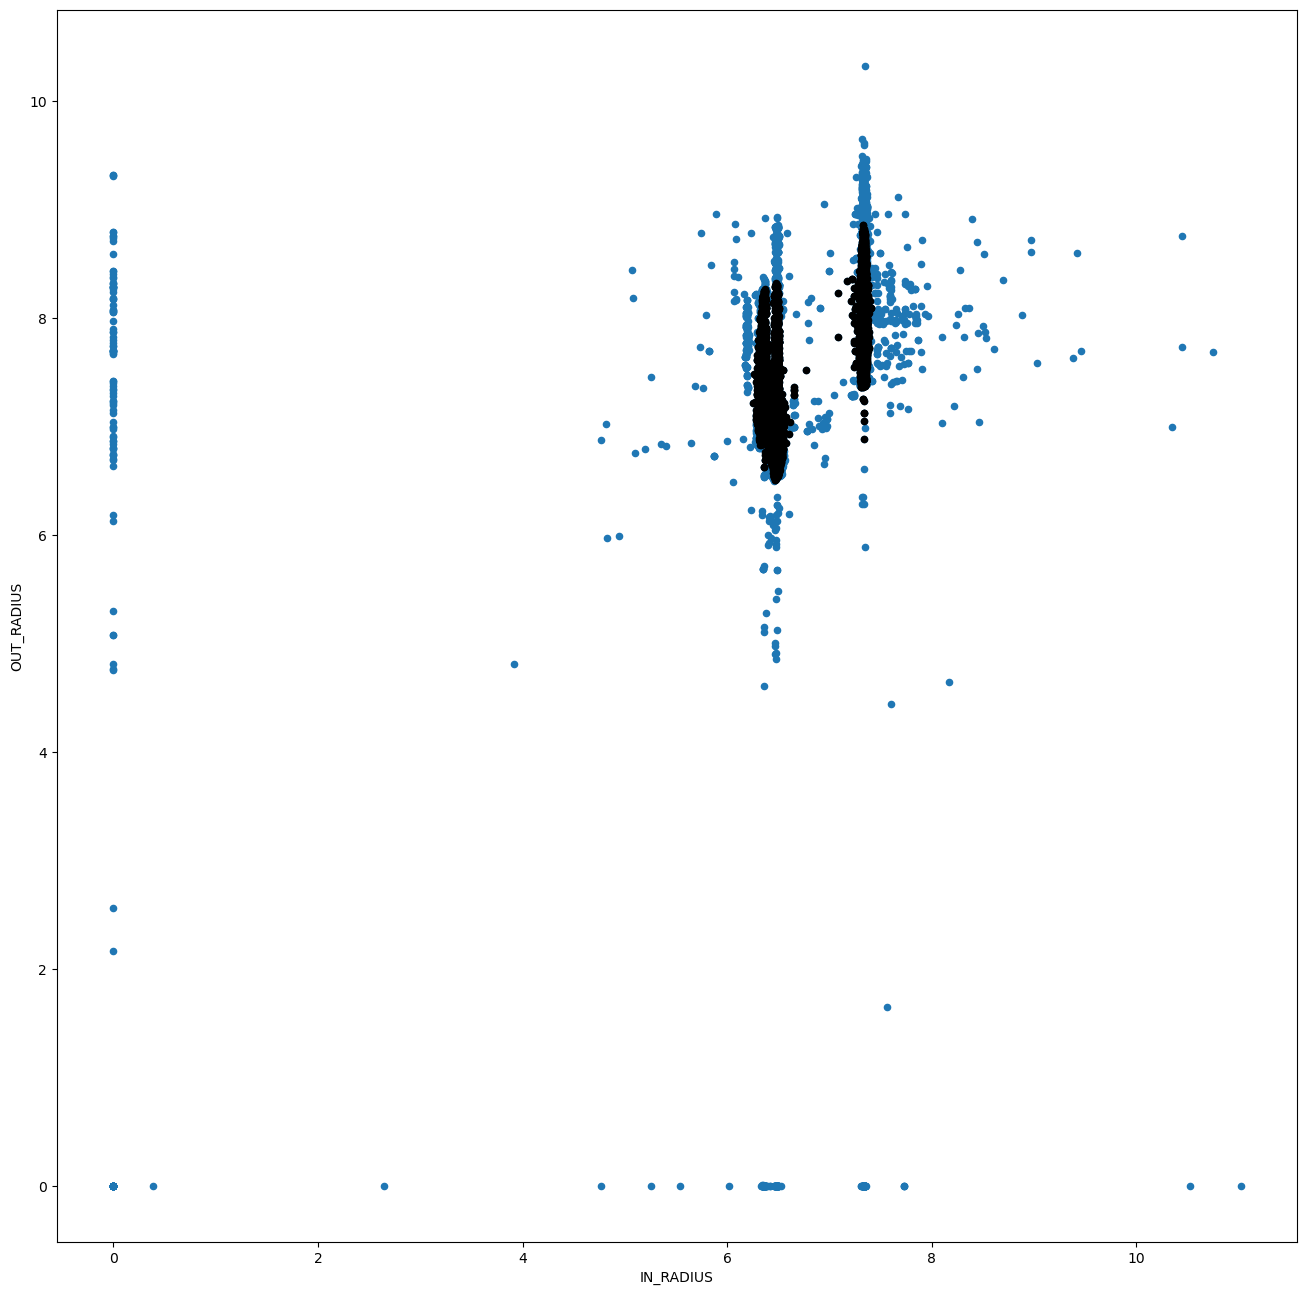

The shape of data after preprocessing :  (26245, 18)


In [18]:
# 이상치 처리

df_after = preprocessing_outlier(df_after)

전처리 후 데이터셋의 정보 확인

In [19]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26245 entries, 0 to 149363
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   EQUIP_ID      26245 non-null  object        
 1   MFG_DT        26245 non-null  datetime64[ns]
 2   SALE_CD       26245 non-null  object        
 3   MOLD_POS      26245 non-null  int64         
 4   REAL_POWER    26245 non-null  float32       
 5   MOLD_IN_TOP   26245 non-null  object        
 6   MOLD_IN_BOT   26245 non-null  object        
 7   MOLD_OUT_TOP  26245 non-null  object        
 8   MOLD_OUT_BOT  26245 non-null  object        
 9   IN_RADIUS     26245 non-null  float32       
 10  OUT_RADIUS    26245 non-null  float32       
 11  POWER         26245 non-null  float32       
 12  POWER1        26245 non-null  float32       
 13  POWER2        26245 non-null  float32       
 14  POWER3        26245 non-null  float32       
 15  POWER4        26245 non-null  float32   

# 데이터 특성 파악

요약 통계량 확인

In [20]:
df_after.describe()

,MFG_DT,MOLD_POS,REAL_POWER,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
count,26245,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000,26245.000000
mean,2020-08-19 19:29:56.502191104,4.498457,-3.955049,6.772677,7.485355,-3.955049,-3.949706,-3.957456,-3.965494,-3.975407,-3.988863
min,2020-01-02 00:00:00,1.000000,-10.000000,6.248300,6.503600,-10.000000,-10.250000,-10.250000,-10.250000,-10.250000,-10.250000
25%,2020-08-10 00:00:00,2.000000,-5.250000,6.460600,7.068100,-5.250000,-5.250000,-5.250000,-5.250000,-5.370000,-5.370000
50%,2020-09-19 00:00:00,4.000000,-3.750000,6.490600,7.423000,-3.750000,-3.870000,-3.870000,-3.870000,-3.870000,-3.870000
75%,2020-10-30 00:00:00,7.000000,-2.500000,7.328500,7.880700,-2.500000,-2.500000,-2.500000,-2.500000,-2.370000,-2.500000
max,2021-04-25 00:00:00,8.000000,-0.250000,7.405600,8.858800,-0.250000,0.000000,0.000000,0.000000,-0.040000,-0.040000
std,NaN,2.293268,1.973040,0.436783,0.514336,1.973040,1.978329,1.979559,1.982146,1.985281,1.985402


상관관계 파악

피어슨 상관 계수를 사용

피어슨 상관 계수는 -1과 1사이의 값을 가진다

절대값이 1에 가까울수록 변수 간의 선형관계가 강하다

<Axes: >

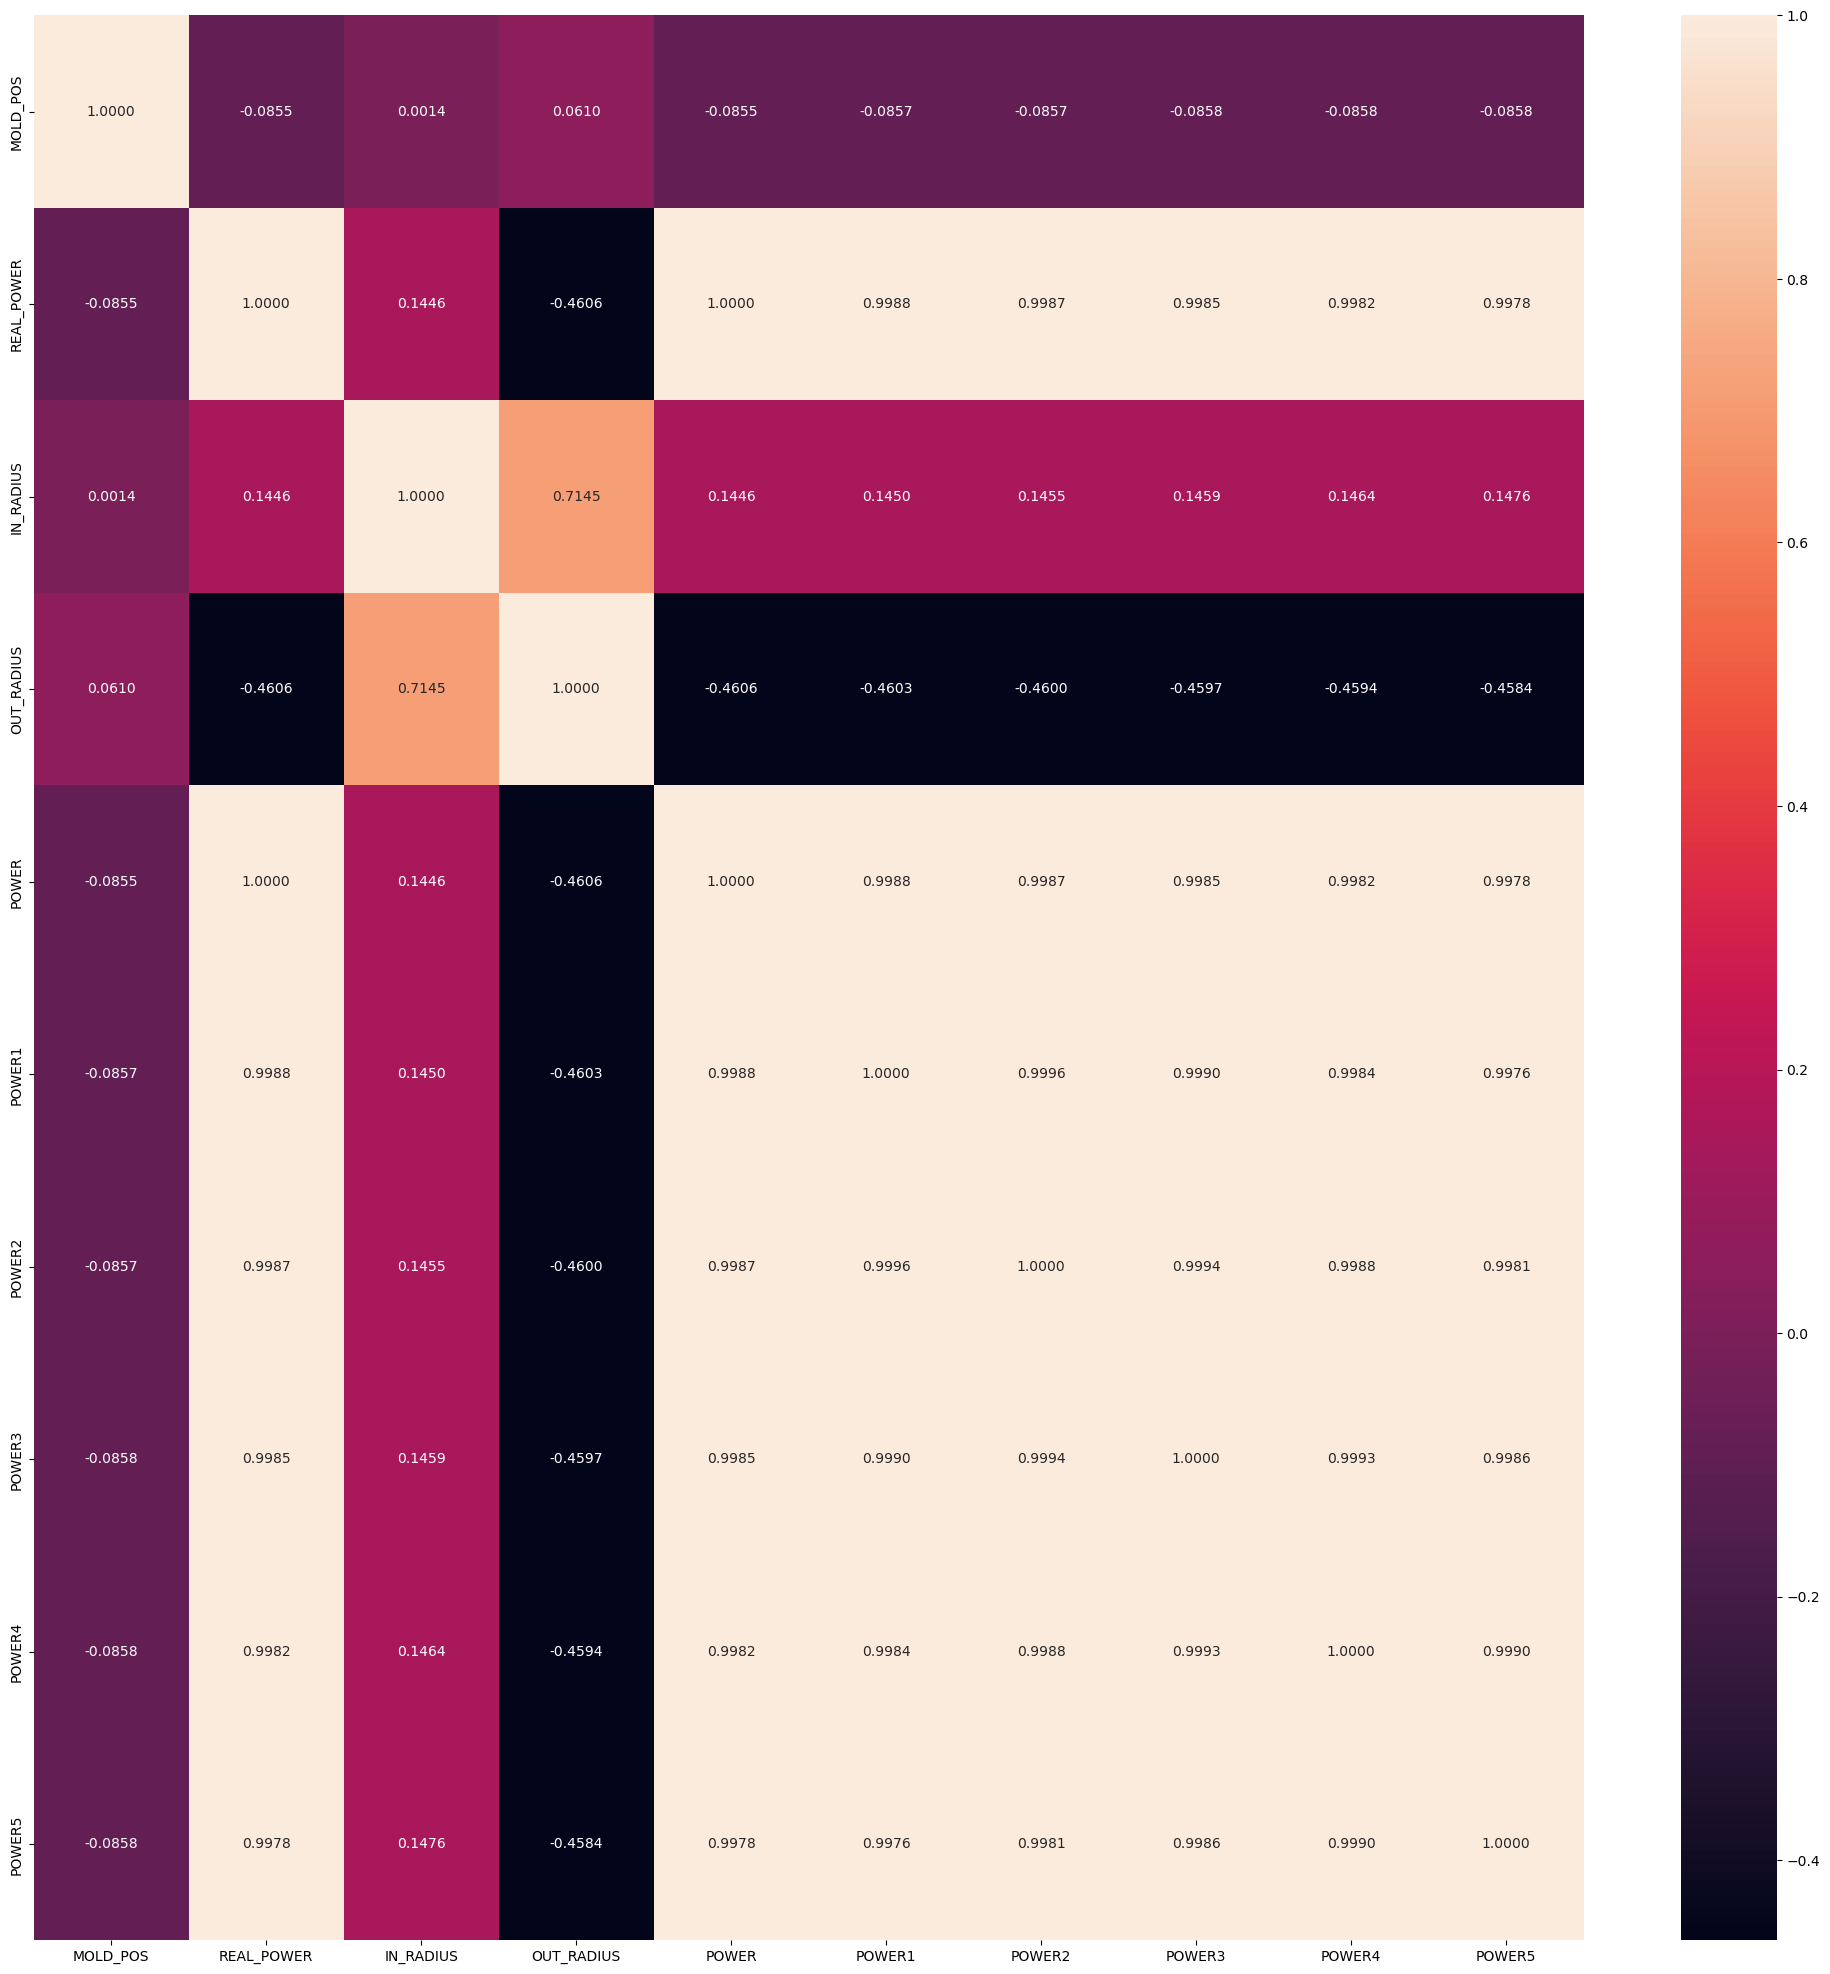

In [33]:
cols = df_after.describe().columns[1:]

plt.subplots(figsize = (25, 25))
sns.heatmap(df_after[cols].corr(), annot = True, fmt = '.4f')

# XGBoost 모델 학습

ENCODER는 XGBoost 학습과 예측에 동일한 컬럼을 가진 X 데이터를 생성하기 위해 사용

N_ESTIMATORS와 같이 상수를 사용하는 XGBoost 모델 파라미터도 변수로 정의

prepare_data는 모델 학습에 필요한 학습 데이터셋과 검증 데이터셋을 생성